# Nomes

* Alícia Marzola Chaves
* Arthur Pereira Carvalho

# Base e Bibliotecas

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
pd.set_option('display.max_colwidth', None, 'display.max_rows', None, 'display.max_columns', None)
np.set_printoptions(threshold=np.inf)

In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="pandas")

In [4]:
df = pd.read_csv('twitterdata.csv')
df.head(5)

,keyword,likes,tweets
0,COVID-19,1,The headline kinda makes it sound like the AP acknowledges that the “emergency measures” taken during the COVID-19 crisis killed more than 1 million Americans.
1,COVID-19,0,"ATLANTIC CITY — The city's Police Athletic League has received $65,000 from the state to restart a youth boxing program shuttered during the COVID-19 pandemic."
2,COVID-19,0,I feel like Diana's line she draws is if his school experience was interpreted by Covid-19 or not
3,COVID-19,1,"COVID-19 was the single most fatal communicable disease in living memory. It could literally kill you for going to the grocery store. But sure, call it a ""civili liberties"" attack if that makes you sleep better at night."
4,COVID-19,0,Studies: Dogs can detect COVID-19 with greater than 80% sensitivity | CIDRAP


# Data Understanding & Visualization

In [5]:
print(f"O Dataset contém {df.shape[1]} colunas e {df.shape[0]} samples.")

O Dataset contém 3 colunas e 128837 samples.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128837 entries, 0 to 128836
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   keyword  128837 non-null  object
 1   likes    128837 non-null  int64 
 2   tweets   128837 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.9+ MB


In [7]:
# Valores Faltantes
df.isna().sum()

keyword    0
likes      0
tweets     0
dtype: int64

Análise de Quantidade de Caracteres por Tweet

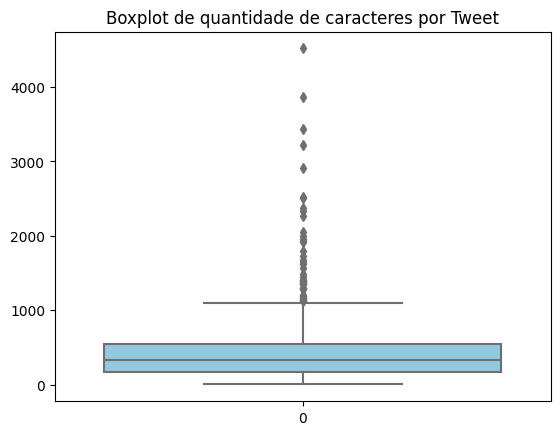

In [8]:
# Cria coluna de tamanho da string
df['len'] = df['tweets'].str.len()

# Agrupa por tamanho
tamanho = df.groupby('len').size()
sns.boxplot(tamanho.index, color='skyblue')
plt.title("Boxplot de quantidade de caracteres por Tweet")
plt.show()

In [9]:
df_max = df.loc[df['tweets'].str.len()>280]
print(f"{len(df_max)} tweets ultrapassam o limite de 280 carcateres.")

1504 tweets ultrapassam o limite de 280 carcateres.


Remoção de outliers

In [10]:
tweets_longos = df_max['tweets'].to_list()
df_filtrada = df.loc[~df['tweets'].isin(tweets_longos)]
df_filtrada['len'].max()

280

Análise de Caracteres e Palavras por Tweet

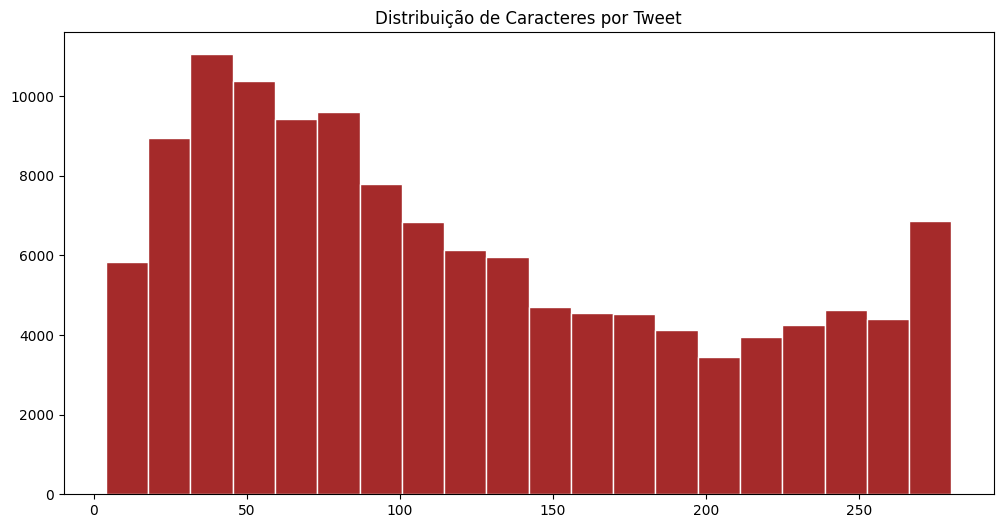

In [11]:
plt.figure(figsize=(12,6))
plt.hist(df_filtrada['len'], color='brown', bins=20, edgecolor='white')
plt.title("Distribuição de Caracteres por Tweet")
plt.show()

/tmp/ipykernel_763/3241805324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrada.loc[:, 'words'] = df_filtrada['tweets'].apply(lambda x: len(x.split()))


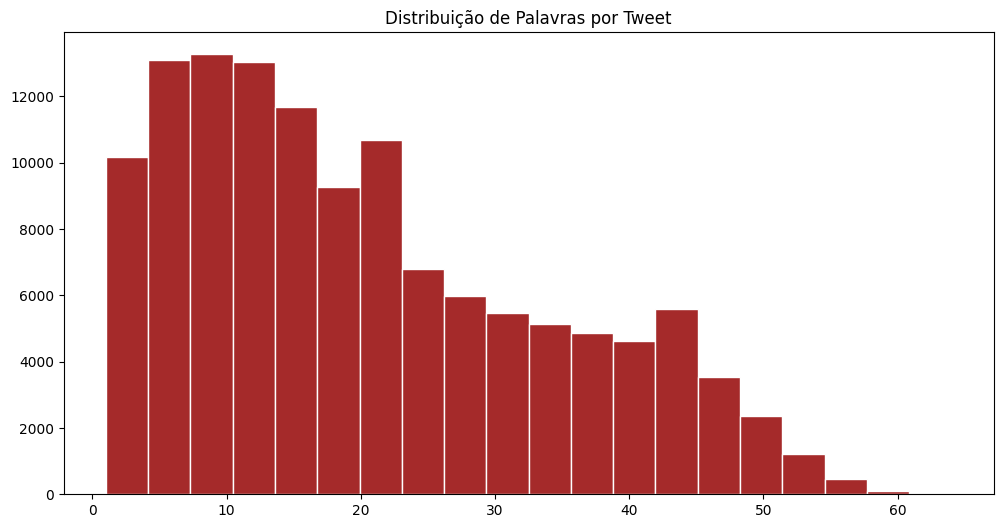

In [12]:
df_filtrada.loc[:, 'words'] = df_filtrada['tweets'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12,6))
plt.hist(df_filtrada['words'], bins=20, edgecolor='white', color='brown')
plt.title('Distribuição de Palavras por Tweet')
plt.show()

Frequência de Palavras

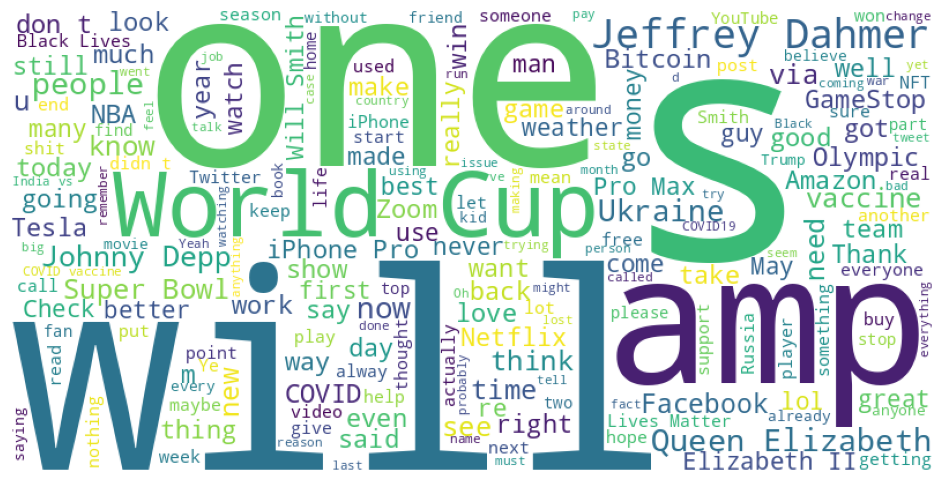

In [13]:
from wordcloud import WordCloud

text = ' '.join(df['tweets'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Análise de Palavras Chave

In [14]:
keywords = df.groupby('keyword').size().sort_values(ascending=False)
print(f"Palavras-chave mais encontradas no dataset:\n{keywords.head(5)}")

Palavras-chave mais encontradas no dataset:
keyword
Amazon                5001
Bitcoin               5001
Black Lives Matter    5001
COVID-19              5001
Elon Musk             5001
dtype: int64


In [15]:
keywords = df.groupby('keyword').size().sort_values(ascending=True)
print(f"Palavras-chave menos encontradas no dataset:\n{keywords.head(5)}")

Palavras-chave menos encontradas no dataset:
keyword
xvideo         109
Instagram      124
porn           213
Remote work    678
TikTok         687
dtype: int64


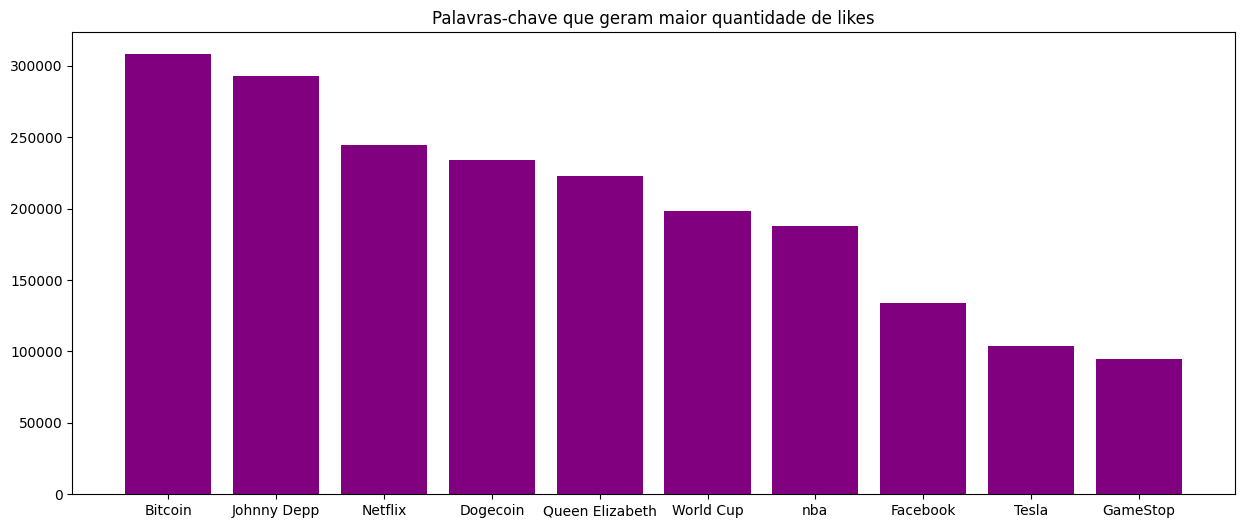

In [16]:
keywords = df_filtrada.groupby('keyword').size()
categories = keywords.index.to_list()

df_categories = df_filtrada.loc[df_filtrada['keyword'].isin(categories)]
likes_per_category = df_categories.groupby('keyword')['likes'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(15,6))
plt.bar(likes_per_category.index, likes_per_category.values, color='purple')
plt.title('Palavras-chave que geram maior quantidade de likes')
plt.show()

Análise de Curtidas

In [17]:
# Medidas Estatísticas
df_filtrada['likes'].describe()

count    127333.000000
mean         23.383412
std         585.593796
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max       82843.000000
Name: likes, dtype: float64

In [18]:
likes = df_filtrada.groupby('likes').size()
likes.head(15)

likes
0     65018
1     24139
2     10379
3      5631
4      3519
5      2461
6      1779
7      1324
8      1065
9       903
10      705
11      631
12      555
13      429
14      439
dtype: int64

/home/alicia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


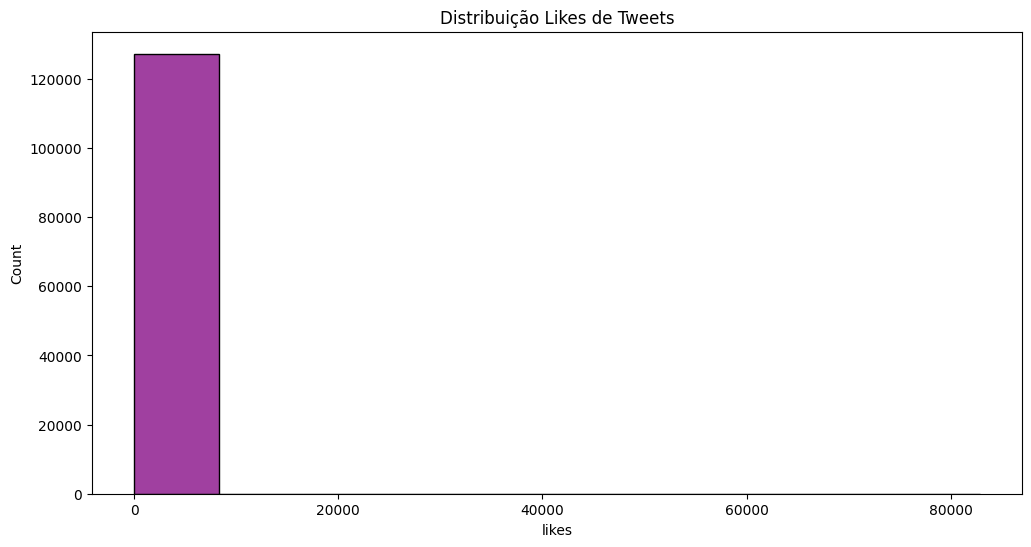

In [19]:
# Distribuição de Likes
plt.figure(figsize=(12,6))
sns.histplot(df_filtrada['likes'], color='purple', bins=10)
plt.title("Distribuição Likes de Tweets")
plt.show()

Divisão de tweets em populares (+1000 curtidas) e não populares para facilitar visualização

/home/alicia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


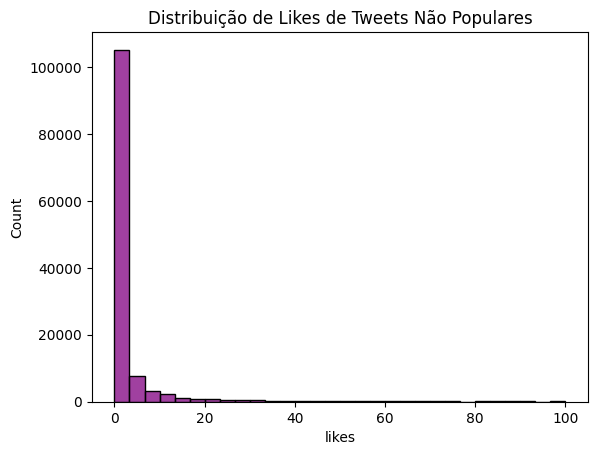

In [20]:
likes100 = df_filtrada.loc[df_filtrada['likes']<=100]
sns.histplot(likes100['likes'], color='purple', bins=30)
plt.title("Distribuição de Likes de Tweets Não Populares")
plt.show()

/home/alicia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Há 335 tweets com mais de 1000 likes.


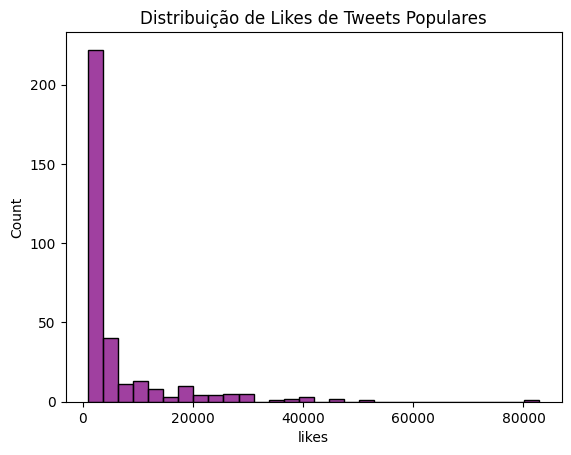

In [21]:
likes1000 = df_filtrada.loc[df_filtrada['likes']>=1000]
print(f"Há {len(likes1000)} tweets com mais de 1000 likes.")
sns.histplot(likes1000['likes'], color='purple', bins=30)
plt.title("Distribuição de Likes de Tweets Populares")
plt.show()

# Regressão Logística

## Pré-Processamento

Análise de Caracteres Especiais

In [22]:
df_filtrada.loc[:, 'emojis'] = df_filtrada['tweets'].str.contains(r'[\u263a-\U0001f645]', na=False)
df_filtrada.loc[:, 'hashtags'] = df_filtrada['tweets'].str.contains('#', na=False)
df_filtrada.loc[:, 'questions'] = df_filtrada['tweets'].str.contains(r'\?', na=False)

url_pattern = r"(?i)\b(?:https?://|ftp://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4})(:\d+)?(/[^\s]*)?"
df_filtrada.loc[:, 'urls'] = df_filtrada['tweets'].str.contains(url_pattern, na=False, regex=True)

/tmp/ipykernel_763/3956776048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrada.loc[:, 'emojis'] = df_filtrada['tweets'].str.contains(r'[\u263a-\U0001f645]', na=False)
/tmp/ipykernel_763/3956776048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrada.loc[:, 'hashtags'] = df_filtrada['tweets'].str.contains('#', na=False)
/tmp/ipykernel_763/3956776048.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

Análise de Sentimento

In [23]:
from textblob import TextBlob

df_filtrada['sentiment'] = df_filtrada['tweets'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_filtrada['positive'] = df_filtrada['sentiment'] >= 0.3
df_filtrada['negative'] = df_filtrada['sentiment'] <= -0.3

df_filtrada[['tweets', 'sentiment', 'positive', 'negative']].head(10)

/tmp/ipykernel_763/236408438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrada['sentiment'] = df_filtrada['tweets'].apply(lambda x: TextBlob(x).sentiment.polarity)
/tmp/ipykernel_763/236408438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrada['positive'] = df_filtrada['sentiment'] >= 0.3
/tmp/ipykernel_763/236408438.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,tweets,sentiment,positive,negative
0,The headline kinda makes it sound like the AP acknowledges that the “emergency measures” taken during the COVID-19 crisis killed more than 1 million Americans.,0.233333,False,False
1,"ATLANTIC CITY — The city's Police Athletic League has received $65,000 from the state to restart a youth boxing program shuttered during the COVID-19 pandemic.",0.000000,False,False
2,I feel like Diana's line she draws is if his school experience was interpreted by Covid-19 or not,0.000000,False,False
3,"COVID-19 was the single most fatal communicable disease in living memory. It could literally kill you for going to the grocery store. But sure, call it a ""civili liberties"" attack if that makes you sleep better at night.",0.357143,True,False
4,Studies: Dogs can detect COVID-19 with greater than 80% sensitivity | CIDRAP,0.500000,True,False
5,"Now you're putting a lot of different things on one pile. Sure there is disagreement about lockdowns, and maybe even about masks, but hardly about vaccines. Either way, this was about Peter McCullough's promoting hydroxychloroquine as a COVID-19 treatment.",0.069444,False,False
6,"Wow,how can you forget the KEMSA scandals which have not been resolved even after the US had Kenya a big lead-up clue and arrested about four Kenyans involved in the COVID-19 scam?This latest one is still fresh.",0.266667,False,False
7,"The hardest thing to change are people's minds. The 2023 Writers Guild of America strike is the largest interruption to American television and film production since the COVID-19 pandemic in 2020, as well as the largest labor stoppage for the WGA since the 2007–08 strike.",0.000000,False,False
8,unroll #COVID19,0.000000,False,False
9,"Hidden in plain sight, the truth about Covid-19 and lockdown.Check out jonah_uk7hotmailcom's video! #TikTok",-0.217262,False,False


## Correlação de Spearman

In [24]:
from scipy.stats import spearmanr

df_filtrada.loc[:, 'popular'] = df_filtrada['likes']>=5

df_corr = df_filtrada[['len', 'words', 'emojis', 'hashtags',
                       'questions', 'urls', 'positive', 'negative', 'popular']]


/tmp/ipykernel_763/3023915554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrada.loc[:, 'popular'] = df_filtrada['likes']>=5


In [25]:
correlation, p_value = spearmanr(df_corr['popular'], df_corr['hashtags'])
print(f"Spearman correlation: {correlation}, P-value: {p_value}")

spearman_corr_matrix = df_corr.corr(method='spearman')
print(spearman_corr_matrix['popular'])

Spearman correlation: 0.0672641678819577, P-value: 1.3723136177752133e-127
len          0.097665
words        0.094541
emojis       0.071802
hashtags     0.067264
questions   -0.013863
urls         0.033238
positive     0.023067
negative    -0.007786
popular      1.000000
Name: popular, dtype: float64


## Modelo

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

X = df_corr.drop('popular', axis=1)
y = df_corr['popular']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [27]:
y_probs = model.predict_proba(X_test)[:, 1] 

threshold = 0.7
y_pred_adjusted = (y_probs >= threshold).astype(int)

print(f"Ajuste de limiar: {threshold}")
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_adjusted))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_adjusted))

precision = precision_score(y_test, y_pred_adjusted)
recall = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)
auc = roc_auc_score(y_test, y_probs)

print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print(f'AUC: {auc}')

Ajuste de limiar: 0.7
Matriz de Confusão:
[[32277   326]
 [ 5473   124]]

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.86      0.99      0.92     32603
        True       0.28      0.02      0.04      5597

    accuracy                           0.85     38200
   macro avg       0.57      0.51      0.48     38200
weighted avg       0.77      0.85      0.79     38200

Precisão: 0.28
Recall: 0.02
F1-Score: 0.04
AUC: 0.6016463835006629


### Odds Ratio

In [28]:
# Coletando os coeficientes do modelo
coefficients = model.coef_[0]

# Calculando o odds ratio (exponenciando os coeficientes)
odds_ratios = np.exp(coefficients)

# Criando um DataFrame para exibir os odds ratios com os nomes das variáveis
odds_ratios_df = pd.DataFrame({
    'Variável': [f'Feature {i+1}' for i in range(X_train_resampled.shape[1])],
    'Coeficiente': coefficients,
    'Odds Ratio': odds_ratios
})

print(odds_ratios_df)

    Variável  Coeficiente  Odds Ratio
0  Feature 1     0.000569    1.000569
1  Feature 2     0.015003    1.015116
2  Feature 3     0.416590    1.516780
3  Feature 4     0.333345    1.395628
4  Feature 5    -0.157912    0.853925
5  Feature 6     0.164776    1.179129
6  Feature 7     0.079917    1.083197
7  Feature 8    -0.008615    0.991422


In [29]:
df_corr.columns

Index(['len', 'words', 'emojis', 'hashtags', 'questions', 'urls', 'positive',
       'negative', 'popular'],
      dtype='object')

# Tokenização

Preparar coluna 'tweets'

In [30]:
import re

# Todas letras minúsculas
df_filtrada.loc[:, 'tweets'] = df_filtrada['tweets'].apply(lambda x: x.lower())

# Remover caracteres especiais
def remove_special_characters(x):
    return re.sub(r'[^A-Za-z0-9\s]', '', x)

df_filtrada.loc[:, 'tweets'] = df_filtrada['tweets'].apply(remove_special_characters)

In [31]:
# Remover URLs
def remove_urls(x):
    return re.sub(r'http[s]?://\S+|www\.\S+', '', x)

df_filtrada.loc[:, 'tweets'] = df_filtrada['tweets'].apply(remove_urls)

Tokenização com Tokenizer do BERT